Zaczytanie wszystkich wartości i zmiana null i braku wartości na NAN

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('messy_data.csv', na_values='NaN', delimiter=r",\s+")

data.info()

data.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        150 non-null    float64
 1   clarity      200 non-null    object 
 2   color        200 non-null    object 
 3   cut          200 non-null    object 
 4   x dimension  197 non-null    float64
 5   y dimension  136 non-null    float64
 6   z dimension  152 non-null    float64
 7   depth        133 non-null    float64
 8   table        168 non-null    object 
 9   price        196 non-null    float64
dtypes: float64(6), object(4)
memory usage: 15.8+ KB


C:\Users\WIN\AppData\Local\Temp\ipykernel_53056\478503931.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('messy_data.csv', na_values='NaN', delimiter=r",\s+")


,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.5,IF,D,Ideal,5.1,5.15,3.20,61.5,NaN,3000.0
1,0.7,vvs2,E,premium,5.7,NaN,3.52,62.0,59,4500.0
2,NaN,Si2,h,Good,4.3,4.31,NaN,62.3,56,700.0
3,1.2,if,d,ideal,NaN,6.82,4.20,61.7,58,10000.0
4,0.9,I1,J,Fair,6.0,NaN,3.70,61.7,NaN,2400.0


In [4]:

columns = data.columns.to_list()

for column in columns:
    if  isinstance(data[column], float):
        data[column].fillna(data[column].mean(), inplace = True)
    else:
        data[column].fillna(data[column].mode()[0], inplace=True)

data.drop_duplicates()
data.info()
data.head(5)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        200 non-null    float64
 1   clarity      200 non-null    object 
 2   color        200 non-null    object 
 3   cut          200 non-null    object 
 4   x dimension  200 non-null    float64
 5   y dimension  200 non-null    float64
 6   z dimension  200 non-null    float64
 7   depth        200 non-null    float64
 8   table        200 non-null    object 
 9   price        200 non-null    float64
dtypes: float64(6), object(4)
memory usage: 15.8+ KB


,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.5,IF,D,Ideal,5.1,5.15,3.20,61.5,56,3000.0
1,0.7,vvs2,E,premium,5.7,5.49,3.52,62.0,59,4500.0
2,0.5,Si2,h,Good,4.3,4.31,3.90,62.3,56,700.0
3,1.2,if,d,ideal,5.9,6.82,4.20,61.7,58,10000.0
4,0.9,I1,J,Fair,6.0,5.49,3.70,61.7,56,2400.0


In [5]:
import re
pattern = re.compile(r'^.{2}$')
pattern2 = re.compile(r'^.{2},$')
comma_pattern = re.compile(r'^,$')


for index, row in data.iterrows():
    for column_name, value in row.items():
        if  isinstance(data.at[index, column_name], float):
            pass
        else:
            if column_name == 'table':
                if pattern.match(value):
                    value = float(value)
                    data.at[index, column_name] = value
                elif pattern2.match(value):
                    value = str(value).strip(',')
                    value = float(value)
                    data.at[index, column_name] = value

                elif comma_pattern.match(value):
                    value = str(value).replace(',', '58')
                    value = float(value)
                    data.at[index, column_name] = value

                else:
                    print("ta wartośc nie matchuje z patternem " + value)
            else:
                data.at[index, column_name] = str(value).upper()

data['table'] = data['table'].astype(float)

        
data = data.rename(columns = {'x dimension' : 'x', 'y dimension' : 'y', 'z dimension' : 'z'})

data.info()
data.head(5)

data.to_csv('cleaned_diamond_data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    200 non-null    float64
 1   clarity  200 non-null    object 
 2   color    200 non-null    object 
 3   cut      200 non-null    object 
 4   x        200 non-null    float64
 5   y        200 non-null    float64
 6   z        200 non-null    float64
 7   depth    200 non-null    float64
 8   table    200 non-null    float64
 9   price    200 non-null    float64
dtypes: float64(7), object(3)
memory usage: 15.8+ KB


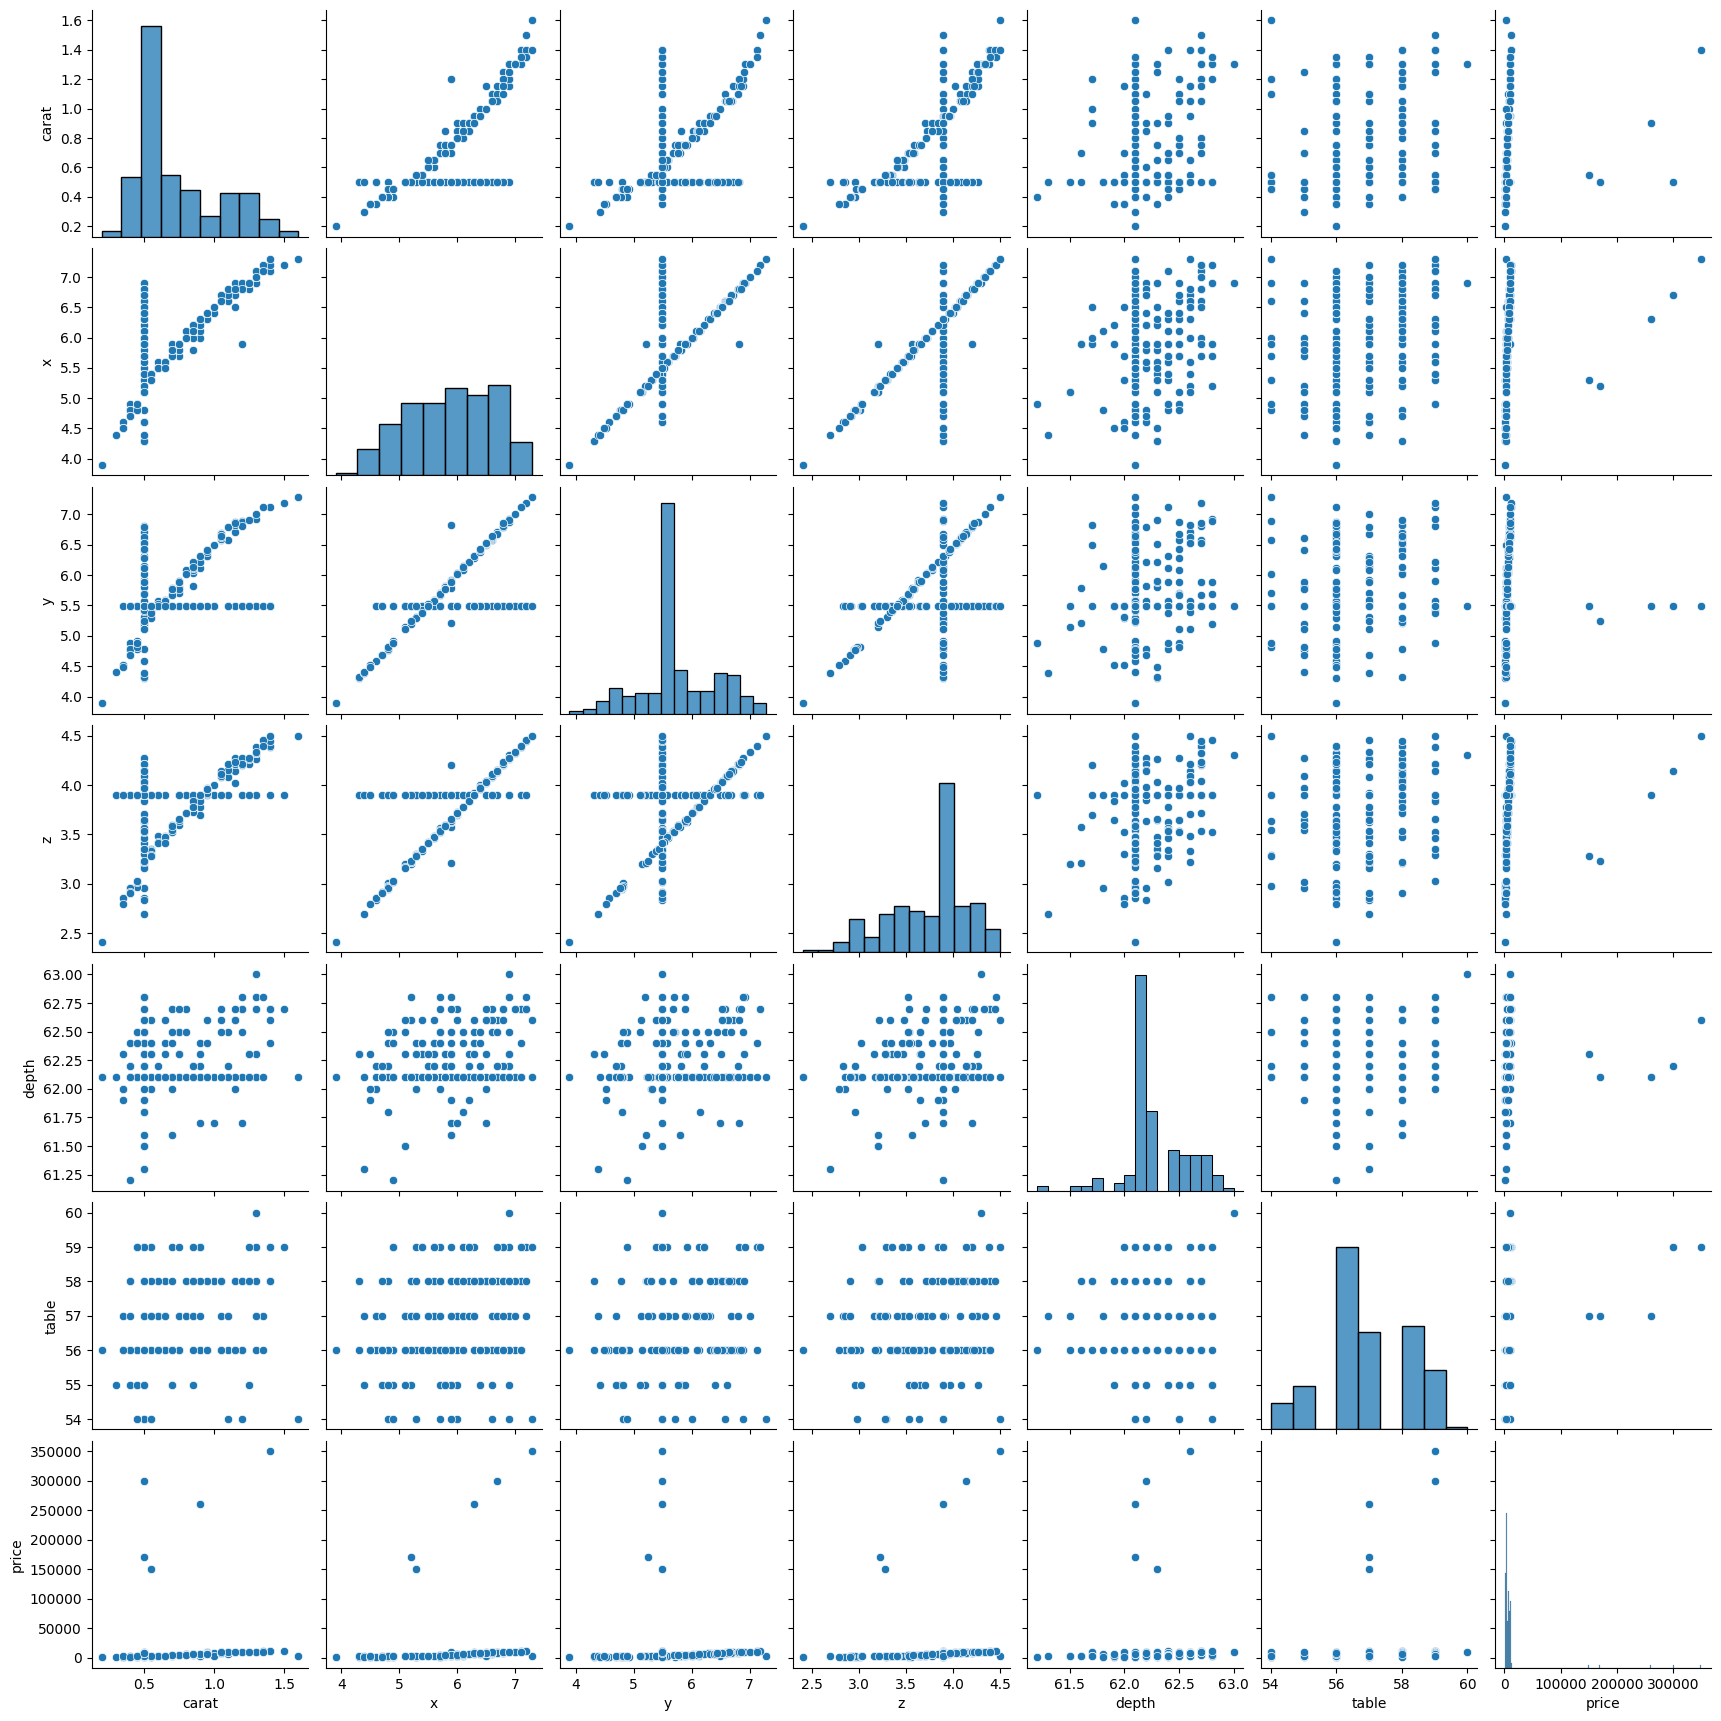

In [6]:
import seaborn as sns 

sns.pairplot(data)